# Comparación de diferentes modelos

Comparando el parámetro n en los n-gramas por lenguaje

In [1]:
import json
import glob
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
metricas_ngramas = {}
# glob.glob('resultados/*metricas.json')
for n in range(2, 6):
    fname = f'resultados/{n}gramas_metricas.json'
    with open(fname, 'r') as f:
        metricas_ngramas[n]= json.load(f)
metricas_ngramas

{2: {'Recall': {'es': 0.9907161804, 'pt': 0.9937777778, 'en': 0.9936},
  'Specifity': {'es': 0.9964210526, 'pt': 0.99500998, 'en': 0.9981373071},
  'Precision': {'es': 0.9887491727, 'pt': 0.9911347518, 'en': 0.9971898836},
  'Accuracy': {'es': 0.9950463407, 'pt': 0.9945669543, 'en': 0.9963247044},
  'f1 score': {'es': 0.9897316992, 'pt': 0.9924545051, 'en': 0.9953917051}},
 3: {'Recall': {'es': 0.9960212202, 'pt': 0.9951111111, 'en': 0.9952},
  'Specifity': {'es': 0.9966315789, 'pt': 0.997754491, 'en': 0.998935604},
  'Precision': {'es': 0.9894598155, 'pt': 0.9959964413, 'en': 0.9983948636},
  'Accuracy': {'es': 0.9964844998, 'pt': 0.9968040908, 'en': 0.9974432726},
  'f1 score': {'es': 0.9927296761, 'pt': 0.9955535794, 'en': 0.9967948718}},
 4: {'Recall': {'es': 0.99933687, 'pt': 0.9942222222, 'en': 0.9928},
  'Specifity': {'es': 0.9953684211, 'pt': 0.999001996, 'en': 0.9984034061},
  'Precision': {'es': 0.9856115108, 'pt': 0.9982150826, 'en': 0.9975884244},
  'Accuracy': {'es': 0.996

In [3]:
metricas_inv = defaultdict(dict)
i = 0
for n, metricas_dict in metricas_ngramas.items():
    j = 0
    for metrica, lang_dict in metricas_dict.items():
        k = 0
        for lang, v in lang_dict.items():  # no inspiration for key/value names...
            if j==0 and i==0:
                metricas_inv[lang] = defaultdict(dict)
                # print('Reset')
            # print(i, j, k)
            # print(f"metricas_inv['{lang}']['{metrica}']['{n}'] = {v}")
            metricas_inv[lang][metrica][n] = v
            k+=1
        j+=1
    i+=1
    # metricas_inv[lang] = dict(metricas_inv[lang])
# metricas_inv = dict(metricas_inv)
metricas_inv

defaultdict(dict,
            {'es': defaultdict(dict,
                         {'Recall': {2: 0.9907161804,
                           3: 0.9960212202,
                           4: 0.99933687,
                           5: 0.9986737401},
                          'Specifity': {2: 0.9964210526,
                           3: 0.9966315789,
                           4: 0.9953684211,
                           5: 0.9947368421},
                          'Precision': {2: 0.9887491727,
                           3: 0.9894598155,
                           4: 0.9856115108,
                           5: 0.9836708034},
                          'Accuracy': {2: 0.9950463407,
                           3: 0.9964844998,
                           4: 0.9963247044,
                           5: 0.9956855225},
                          'f1 score': {2: 0.9897316992,
                           3: 0.9927296761,
                           4: 0.9924267369,
                           5: 0.9911154985}}),


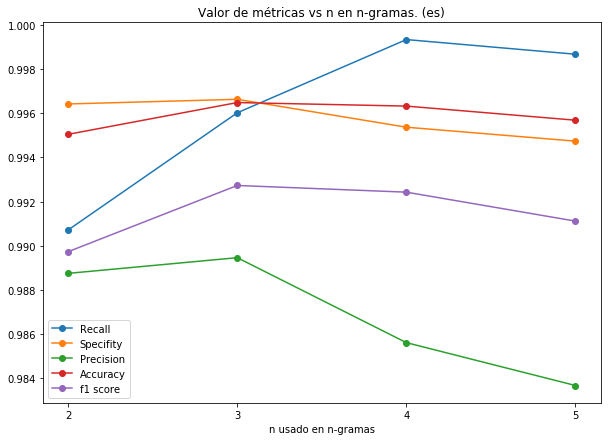

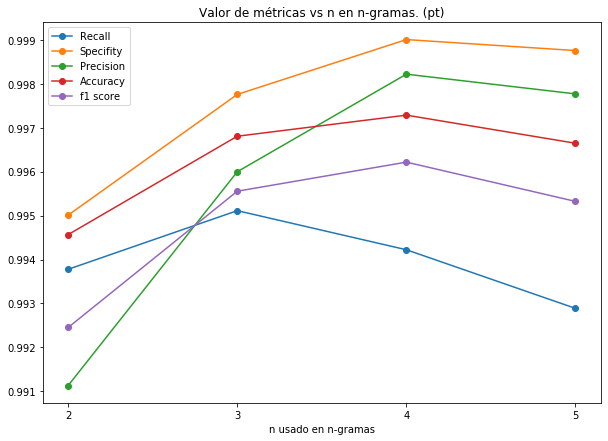

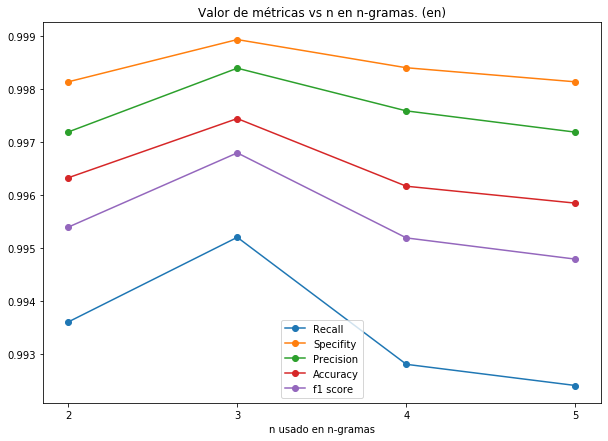

In [4]:
for lang, lang_dict in metricas_inv.items():
    plt.figure(figsize=(10,7))
    plt.title(f'Valor de métricas vs n en n-gramas. ({lang})')
    for metrica, metrica_dict in lang_dict.items():
        x = [n for n in metrica_dict.keys()]
        y = [val for val in metrica_dict.values()]
        line, = plt.plot(x, y, marker = 'o')
        line.set_label(metrica)
        plt.legend()
    plt.xlabel('n usado en n-gramas')
    plt.xticks(x)
    plt.savefig(f'resultados/{lang}_comparacion.png')
    plt.show()